In [1]:
%reload_ext autoreload
%autoreload 2

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import random

In [3]:
import sys
sys.path.append('..')

from yelpsent import data
from yelpsent import features

# Load Dataset

In [4]:
data_train, data_test = data.load_dataset("../data/yelp_train.json",
                                          "../data/yelp_test.json")

In [5]:
data_train.head()

,review,sentiment
0,"The food was great and unique, we both loved i...",5
1,"So disappointing, don't know if it's the chang...",2
2,"Nice staff and good food, but seems like an un...",3
3,Average Joe's is definitely not average at all...,5
4,"Everything about this place is perfectly fine,...",2


In [6]:
data_train.describe()

,sentiment
count,271915.000000
mean,3.625935
std,1.263561
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [7]:
data_test.head()

,review,sentiment
0,Dropped by on a week night because I was reall...,4
1,"4 of us waited 30 mins for the coffee, got up ...",1
2,Twenty-two dollars for two people for a lunch ...,4
3,I love this place! Great location in the heart...,5
4,I walked an hour across town to get here becau...,5


In [8]:
data_test.describe()

,sentiment
count,90639.000000
mean,3.624091
std,1.263476
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [9]:
X_train = data_train['review'].tolist()
y_train = data_train['sentiment'].tolist()

In [10]:
X_test = data_test['review'].tolist()
y_test = data_test['sentiment'].tolist()

# Build Document-to-Term Matrix

In [11]:
tokenizer = features.get_regexp_tokenizer(r'[a-zA-Z]+')
# tokenizer = None

In [12]:
stop_words = features.get_stop_words('english')

[nltk_data] Downloading package stopwords to /Users/dliu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
cv = features.get_count_vectorizer(X_train,
                                   tokenizer=tokenizer,
                                   stop_words=stop_words,
                                   ngram_range=(1,2))

/Users/dliu/anaconda3/envs/yelp/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [14]:
X_train_dtm = cv.transform(X_train)

In [15]:
X_test_dtm = cv.transform(X_test)

In [67]:
features.get_examples(phrase='disappoint',
                     dtm=X_train_dtm,
                     cv=cv,
                     n=5)

[181, 237, 325, 652, 830, 904]

In [69]:
X_train[237]

"Totaly kick-ass tacos. I ate at the Combine on the Danforth a couple of times in the last year and was so disappointed. I haven't had the stones to try to get into Grand Electric (or deep down know it can't possibly live up to the hype.)\n\nBut,  honestly, I don't feel that I need to try now. I came in here with a girlfriend around 6 PM on a Saturday after she swore up and down that she had tried every taco joint in the city and that El Asador was her firm favourite. It didn't disappoint in that regard.\n\nI had \n- one of the daily specials (goat)\n- an alpastor\n- chorizo\n- fish\n\nEach taco came with a double tortilla which made the eating experience less messy then I'm used to. The goat taco was one of the best things I have eaten in months. The alpastor was a little dry, but the pineapple was a welcome flavour. The chorizo and fish were very good. I noticed they had mexican coke, and beer was very reasonably priced. Ordered at the counter, and service was friendly and FAST.\n\nS

# Naive Bayes

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [17]:
clf_nb = MultinomialNB().fit(X_train_dtm, y_train)

In [18]:
y_train_pred = clf_nb.predict(X_train_dtm)

In [19]:
print("Training Accuracy:", metrics.accuracy_score(y_train, y_train_pred))

Training Accuracy: 0.8844234411488885


In [20]:
y_test_pred = clf_nb.predict(X_test_dtm)

In [21]:
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Testing Accuracy: 0.514822537759684


# Evaluation

In [27]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

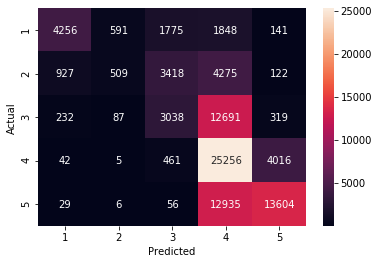

In [36]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=set(y_test),
            yticklabels=set(y_test))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [34]:
# Example
example_actual = 3
example_pred = 4
example_incorrects = []
for i in range(len(y_test_pred)):
    if y_test_pred[i] == example_pred and y_test[i] == example_actual:
        example_incorrects.append(i)

In [35]:
r = random.choice(example_incorrects)
print("{0} : {1}".format(r, data_test.loc[r,'review']))

64119 : Also came here on a Groupon, no issues using it. Redeemed just using my iPhone too, didn't need to print it off.

Lovely setting, the jars of preserves on the wall are really neat! Very nice wine list, great variety.

I was REALLY excited to try the scallops, but they did not have it on the menu. Waiter talked them up for a few minutes only to come back later to say they didn't have them, and was an old menu. He then replaced the menu with a newer version which didn't include the scallops, but did include a great pork loin. 
Cheddar and Apple salad was quite good!
Service was attentive, and relatively quick. 

Moderately disappointed with the flatbread, it was cold! How can it have melted cheese on it, but be cold?! Fail.

Seems to be a reoccurring theme with reviews on here that one hand doesn't talk to the other. 

May return...but like sushi places, there are tons of wine bars out there.
